In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
#loading the training and the test data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
#finding the shape of training and test data
print('Shape of training data is',x_train.shape[0],'and each image is of size {} x {}'.format(x_train.shape[1],x_train.shape[2]))
print('Shape of test dats is ',x_test.shape[0],'and each image is of size {} x {}'.format(x_test.shape[1],x_test.shape[2]))

Shape of training data is 60000 and each image is of size 28 x 28
Shape of test dats is  10000 and each image is of size 28 x 28


In [0]:
#as the input image is of size 28*28 thats why we will convert each one of them to a 1*784 vector 
#i.e each pixel reperesents a dimension of the image 
#we will reshape the matrix 

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [5]:
#shape of the data after converting from 3d to 2d

print('SHAPE OF TRAINING DATA IS: ',x_train.shape[0],'AND EACH IMAGE IS OF SIZE: ',x_train.shape[1])
print('SHAPE OF TEST DATA IS: ',x_test.shape[0],'EACH IMAGE IS OF SIZE: ',x_test.shape[1])

SHAPE OF TRAINING DATA IS:  60000 AND EACH IMAGE IS OF SIZE:  784
SHAPE OF TEST DATA IS:  10000 EACH IMAGE IS OF SIZE:  784


In [6]:
#example data point
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:

x_train = x_train/255
x_test = x_test/255

In [8]:
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [9]:
#printing the class labels of some of the images
print('class label of first image',y_train[0])
print('class label of 11th image',y_train[10])
print('class label of 100th image',y_train[99])


#also we are converting here 10 class output to binary using to_categorical function of keras
#in a way we are performing one hot encoding on the output data

Y_train = np_utils.to_categorical(y_train,10)
Y_test = np_utils.to_categorical(y_test,10)

print('AFTER encoding')
print('output for first image is ',Y_train[0])
print('output for 11th image is',Y_train[10])
print('output for 100th image is ',Y_train[99])

class label of first image 5
class label of 11th image 3
class label of 100th image 1
AFTER encoding
output for first image is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
output for 11th image is [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
output for 100th image is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


# WE will use three different architectures for model implementation
- Model with 2 hidden layers 
- Model with 3 hidden layers
- Model with 5 hidden layers

 __In Each Architecture We will implement 4 models__:
 
 - MLP + Relu + Adam
 - MLP + Relu + Adam + Dropout
 - MLP + Relu + Adam + Batch Normalization
 - MLP + Relu + Adam + Dropout + Batch Normalization
 
 
 
 In each of the models we will perform hypereparameter tuning using GridSearch CV and Randomized cv

In [0]:
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense,Activation
#here we are importing the sequential and the dense,activation to specify about the fully connected MLP and the activation function required for it in each layer


#some model parameters

output_dim = 10
input_dim = x_train.shape[1]
batch_size = 128
nb_epoch = 20


## 1. Architecture1: Model with 2 hidden layers:

### input(784)-Relu(512)-Relu(256)-Output(10)

### 1.1 MLP + Relu + Adamoptimizer

In [11]:
""" for weight initialization we wii initailize using He normalization
"""
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.088  => N(0,σ) = N(0,0.088)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120))

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(x_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, Y_test))

W0827 14:22:42.262042 139961174951808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 14:22:42.285037 139961174951808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 14:22:42.289400 139961174951808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0827 14:22:42.337172 139961174951808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 14:22:42.357798 139961174951808 deprecation_wra

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.2184 - acc: 0.9336 - val_loss: 0.1089 - val_acc: 0.9656
Epoch 2/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0821 - acc: 0.9752 - val_loss: 0.0842 - val_acc: 0.9735
Epoch 3/20
60000/60000 [==============================] - 3s 51us/step 

In [12]:
#evaluation on test data

score = model_relu.evaluate(x_test,Y_test,verbose = 1)
print('Loss on test data is: ',score[0])
print('accuracy on test data is: ',score[1])

10000/10000 [==============================] - 1s 53us/step
Loss on test data is:  0.09651037384942601
accuracy on test data is:  0.9811


In [0]:
import pickle
def savetofile(obj,filename):
  pickle.dump(obj,open(filename+".p",'wb'))
  
def openfromfile(filename):
  temp = pickle.load(open(filename+".p",'rb'))
  return temp

In [0]:

def violin_plot(dl_model):
  w_after= dl_model.get_weights()
  h1_w = w_after[0].flatten().reshape(-1,1)
  h2_w = w_after[2].flatten().reshape(-1,1)
  out_w  = w_after[4].flatten().reshape(-1,1)


  fig = plt.figure(figsize = (15,5))
  plt.title("Weight matrices after model trained")
  plt.subplot(1, 3, 1)
  plt.title("Trained model Weights")
  ax = sns.violinplot(y=h1_w,color='b')
  plt.xlabel('Hidden Layer 1')

  plt.subplot(1, 3, 2)
  plt.title("Trained model Weights")
  ax = sns.violinplot(y=h2_w, color='r')
  plt.xlabel('Hidden Layer 2 ')

  plt.subplot(1, 3, 3)
  plt.title("Trained model Weights")
  ax = sns.violinplot(y=out_w,color='y')
  plt.xlabel('Output Layer ')
  plt.show()

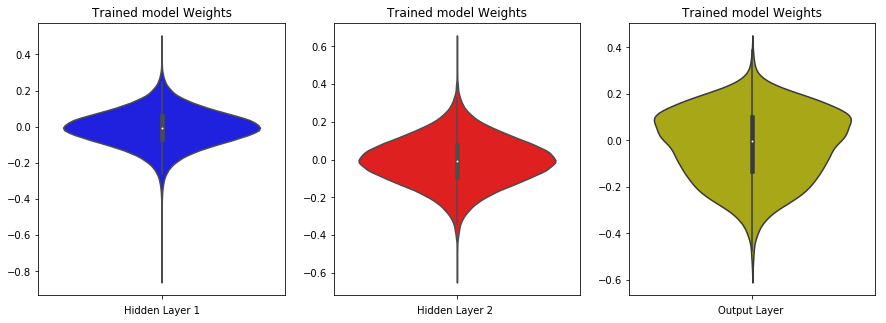

In [16]:
violin_plot(model_relu)

In [0]:
arch_1_model_1 = savetofile(history,'arch_1_model_1') 

### 1.2 MLP + Relu + Adamoptimizer  + dropout

In [19]:
from keras.layers import Dropout
model_relu_drop = Sequential()

model_relu_drop.add(Dense(512,activation = 'relu',input_shape = (input_dim,), kernel_initializer = RandomNormal(mean = 0.0,stddev = 0.062,seed = None)))
model_relu_drop.add(Dropout(0.5))
#adding the dropout layer for each layer

model_relu_drop.add(Dense(256,activation = 'relu',kernel_initializer = RandomNormal(mean = 0.0,stddev = 0.088,seed = None)))
model_relu_drop.add(Dropout(0.5))


model_relu_drop.add(Dense(output_dim,activation = 'softmax'))
print(model_relu_drop.summary())

model_relu_drop.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_relu_drop.fit(x_train,Y_train,batch_size = batch_size,epochs = nb_epoch,verbose = 1,validation_data = (x_test,Y_test))



W0827 14:28:45.499598 139961174951808 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.

In [20]:
score = model_relu_drop.evaluate(x_test,Y_test,verbose = 1)
print('Loss on test data is: ',score[0])
print('accuracy on test data is: ',score[1])

10000/10000 [==============================] - 1s 53us/step
Loss on test data is:  0.058890673811543455
accuracy on test data is:  0.9847


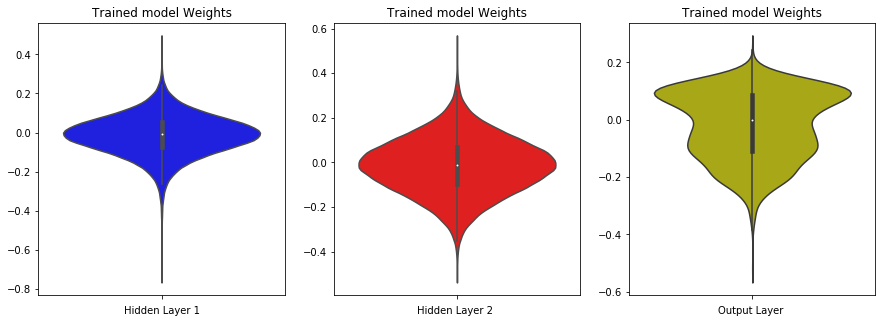

In [21]:
violin_plot(model_relu_drop)

In [0]:
arch_1_model_2 = savetofile(history,'arch_1_model_2')

### 1.3 MLP + Relu + Adamoptimizer + BatchNormalization

In [23]:
from keras.layers import BatchNormalization

model_relu_batch = Sequential()
model_relu_batch.add(Dense(512,activation = 'relu',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean = 0.0,stddev = 0.062,seed = None)))
model_relu_batch.add(BatchNormalization())

model_relu_batch.add(Dense(256,activation = 'relu',kernel_initializer = RandomNormal(mean = 0.0,stddev = 0.088,seed = None)))
model_relu_batch.add(BatchNormalization())

model_relu_batch.add(Dense(output_dim,activation = 'softmax'))
print(model_relu_batch.summary())


model_relu_batch.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_relu_batch.fit(x_train,Y_train,batch_size = batch_size,epochs = nb_epoch,verbose = 1,validation_data = [x_test,Y_test])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 538,890
Trainable params: 537,354
Non-trainable params: 1,536
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 93us/step - loss

In [24]:
score = model_relu_batch.evaluate(x_test,Y_test,verbose = 1)
print('Loss on the test data is: ',score[0])
print('Accuracy on the test data is:',score[1])


10000/10000 [==============================] - 1s 64us/step
Loss on the test data is:  0.0839915322766581
Accuracy on the test data is: 0.9798


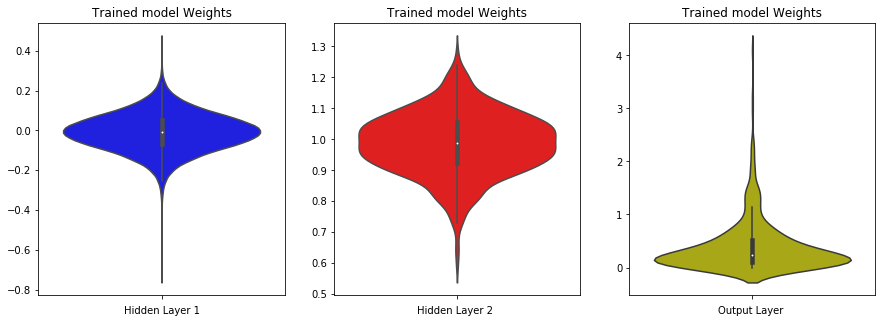

In [25]:
violin_plot(model_relu_batch)

In [0]:
arch_1_mode_3 = savetofile(history,'arch_1_model_3')

### 1.4 MLP + Relu + Adamoptimizer + BatchNormalization  +Dropout

In [27]:
model_relu_batch_drop = Sequential()
model_relu_batch_drop.add(Dense(512,activation = 'relu',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean = 0.0,stddev = 0.068,seed = None)))
model_relu_batch_drop.add(BatchNormalization())
model_relu_batch_drop.add(Dropout(0.5))


model_relu_batch_drop.add(Dense(256,activation = 'relu',kernel_initializer = RandomNormal(mean = 0.0,stddev = 0.088,seed = None)))
model_relu_batch_drop.add(BatchNormalization())
model_relu_batch_drop.add(Dropout(0.5))


model_relu_batch_drop.add(Dense(output_dim,activation = 'softmax'))
print(model_relu_batch_drop.summary())

model_relu_batch_drop.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_relu_batch_drop.fit(x_train,Y_train,batch_size = batch_size,epochs = nb_epoch,verbose = 1,validation_data = [x_test,Y_test])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
Total para

In [28]:
score = model_relu_batch_drop.evaluate(x_test,Y_test)
print('loss on test data is:',score[0])
print('accuracy on test data is',score[1])

10000/10000 [==============================] - 1s 68us/step
loss on test data is: 0.05505812452407554
accuracy on test data is 0.9846


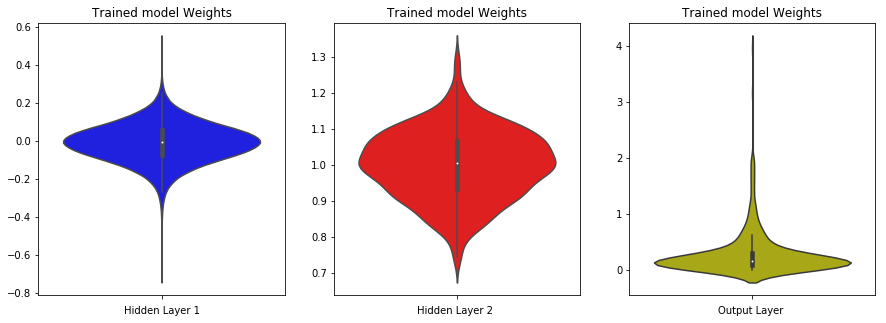

In [29]:
violin_plot(model_relu_batch_drop)

In [0]:
arch_1_model_4 = savetofile(history,'arch_1_model_4')

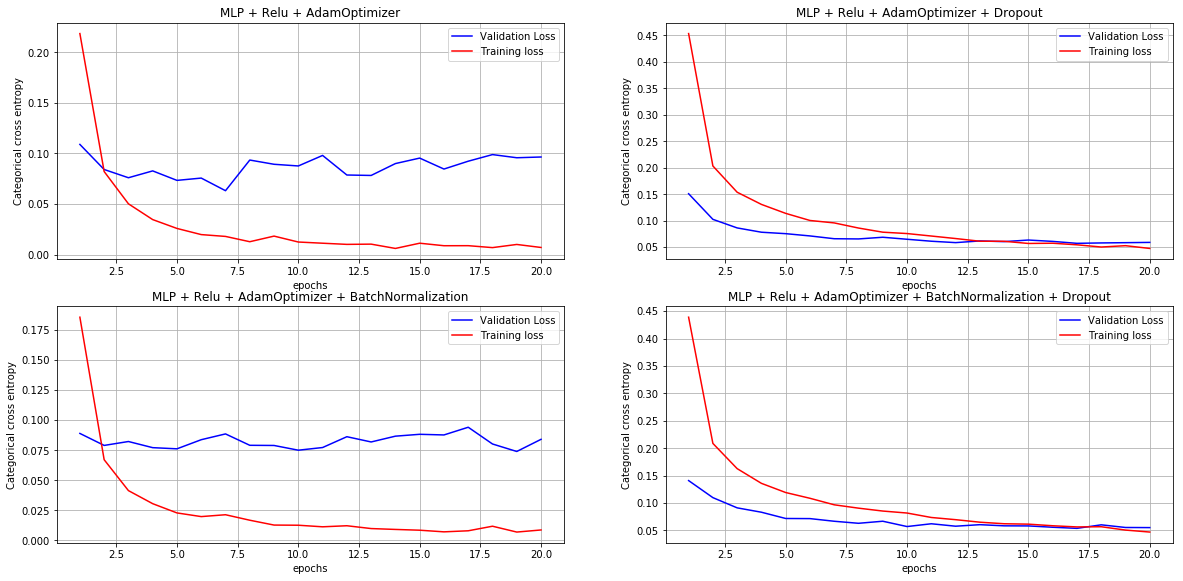

In [31]:
#plotting for all 4 models

plt.figure(figsize = (20,20))
plt.grid()
x = list(range(1,nb_epoch+1))

"""MODEL 1"""
plt.subplot(4,2,1)
plt.title('MLP + Relu + AdamOptimizer')
plt.grid()
plt.plot(x,openfromfile('arch_1_model_1').history['val_loss'],color = 'b',label = 'Validation Loss')
plt.plot(x,openfromfile('arch_1_model_1').history['loss'],color = 'r',label = 'Training loss')
plt.xlabel('epochs')
plt.ylabel('Categorical cross entropy')
plt.legend()


"""MODEL 2"""

plt.subplot(4,2,2)
plt.title('MLP + Relu + AdamOptimizer + Dropout')
plt.grid()
plt.plot(x,openfromfile('arch_1_model_2').history['val_loss'],color = 'b',label = 'Validation Loss')
plt.plot(x,openfromfile('arch_1_model_2').history['loss'],color = 'r',label = 'Training loss')
plt.xlabel('epochs')
plt.ylabel('Categorical cross entropy')
plt.legend()



"""MODEL 3"""
plt.subplot(4,2,3)
plt.title('MLP + Relu + AdamOptimizer + BatchNormalization')
plt.grid()
plt.plot(x,openfromfile('arch_1_model_3').history['val_loss'],color = 'b',label = 'Validation Loss')
plt.plot(x,openfromfile('arch_1_model_3').history['loss'],color = 'r',label = 'Training loss')
plt.xlabel('epochs')
plt.ylabel('Categorical cross entropy')
plt.legend()


"""MODEL 4"""
plt.subplot(4,2,4)
plt.title('MLP + Relu + AdamOptimizer + BatchNormalization + Dropout')
plt.grid()
plt.plot(x,openfromfile('arch_1_model_4').history['val_loss'],color = 'b',label = 'Validation Loss')
plt.plot(x,openfromfile('arch_1_model_4').history['loss'],color = 'r',label = 'Training loss')
plt.xlabel('epochs')
plt.ylabel('Categorical cross entropy')
plt.legend()
plt.show()

## 2. ARCHITECTURE 2: Model with 3 hidden layers

### Input(786) - relu(1000) - relu(500)-relu(250)-softmax(10)

In [0]:
### Model 1: MLP + Relu + Adamoptimizer

In [33]:


# for relu layers
from keras.initializers import he_normal

model_relu = Sequential()
model_relu.add(Dense(1000, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed = None)))
model_relu.add(Dense(500, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(250, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(x_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, Y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_14 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_15 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                2510      
Total params: 1,413,260
Trainable params: 1,413,260
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.1955 - acc: 0.9404 - val_loss: 0.0872 - val_acc: 0.9739
Epoch 2/20
60000/60000 [==============================] - 4s 70us/step -

In [34]:
#evaluation on test data

score = model_relu.evaluate(x_test,Y_test,verbose = 1)
print('Loss on test data is: ',score[0])
print('accuracy on test data is: ',score[1])

10000/10000 [==============================] - 1s 71us/step
Loss on test data is:  0.08816329310913239
accuracy on test data is:  0.982


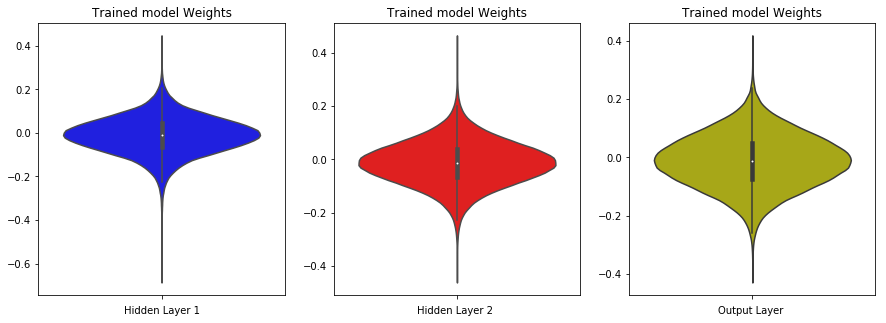

In [37]:
violin_plot(model_relu)

In [0]:
arch_2_model_1 = savetofile(history,'arch_2_model_1')

### Model 2: MLP + Relu + AdamOptimizer + Dropout

In [39]:


from keras.layers import Dropout
model_relu_drop = Sequential()

model_relu_drop.add(Dense(1000,activation = 'relu',input_shape = (input_dim,), kernel_initializer = he_normal(seed = None)))
model_relu_drop.add(Dropout(0.5))

model_relu_drop.add(Dense(500,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model_relu_drop.add(Dropout(0.5))

model_relu_drop.add(Dense(250,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model_relu_drop.add(Dropout(0.5))



model_relu_drop.add(Dense(output_dim,activation = 'softmax'))
print(model_relu_drop.summary())

model_relu_drop.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_relu_drop.fit(x_train,Y_train,batch_size = batch_size,epochs = nb_epoch,verbose = 1,validation_data = (x_test,Y_test))




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_6 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 250)               125250    
_________________________________________________________________
dropout_7 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                2510      
Total para

In [40]:
score = model_relu_drop.evaluate(x_test,Y_test,verbose = 1)
print('Loss on test data is: ',score[0])
print('accuracy on test data is: ',score[1])

10000/10000 [==============================] - 1s 69us/step
Loss on test data is:  0.061200255445798345
accuracy on test data is:  0.9836


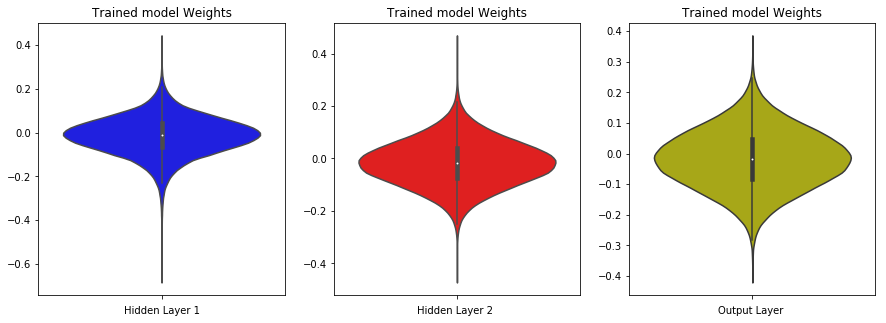

In [41]:
violin_plot(model_relu_drop)

In [0]:
arch_2_model_2 = savetofile(history,'arch_2_model_2')

### Model3 : MLP + Relu + Adamoptimizer + BatchNormalization

In [43]:
## Model 3
model_relu_batch = Sequential()
model_relu_batch.add(Dense(1000,activation = 'relu',input_shape = (input_dim,),kernel_initializer = he_normal(seed = None)))
model_relu_batch.add(BatchNormalization())

model_relu_batch.add(Dense(500,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model_relu_batch.add(BatchNormalization())

model_relu_batch.add(Dense(250,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model_relu_batch.add(BatchNormalization())

model_relu_batch.add(Dense(output_dim,activation = 'softmax'))
print(model_relu_batch.summary())


model_relu_batch.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_relu_batch.fit(x_train,Y_train,batch_size = batch_size,epochs = nb_epoch,verbose = 1,validation_data = [x_test,Y_test])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1000)              785000    
_________________________________________________________________
batch_normalization_5 (Batch (None, 1000)              4000      
_________________________________________________________________
dense_22 (Dense)             (None, 500)               500500    
_________________________________________________________________
batch_normalization_6 (Batch (None, 500)               2000      
_________________________________________________________________
dense_23 (Dense)             (None, 250)               125250    
_________________________________________________________________
batch_normalization_7 (Batch (None, 250)               1000      
_________________________________________________________________
dense_24 (Dense)             (None, 10)                2510      
Total para

In [44]:
score = model_relu_batch.evaluate(x_test,Y_test,verbose = 1)
print('Loss on the test data is: ',score[0])
print('Accuracy on the test data is:',score[1])

10000/10000 [==============================] - 1s 100us/step
Loss on the test data is:  0.07504327980409116
Accuracy on the test data is: 0.9837


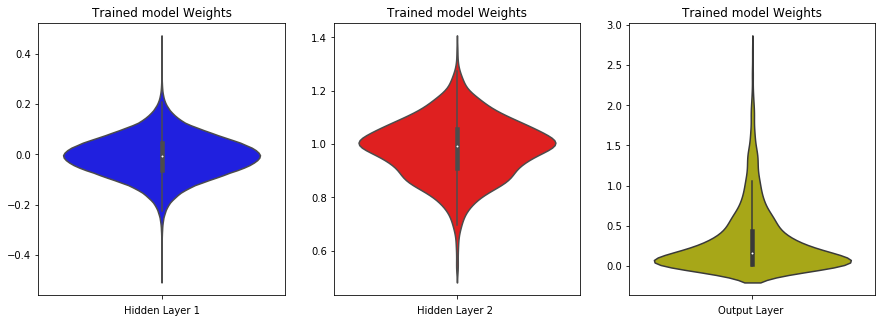

In [45]:
violin_plot(model_relu_batch)

In [0]:
arch_2_model_3 = savetofile(history,'arch_2_model_3')

### Model4: MLP + Relu + Adamoptimizer + BatchNormalization + Dropout

In [47]:
## Model 4

model_relu_batch_drop = Sequential()
model_relu_batch_drop.add(Dense(1000,activation = 'relu',input_shape = (input_dim,),kernel_initializer = he_normal(seed = None)))
model_relu_batch_drop.add(BatchNormalization())
model_relu_batch_drop.add(Dropout(0.5))


model_relu_batch_drop.add(Dense(500,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model_relu_batch_drop.add(BatchNormalization())
model_relu_batch_drop.add(Dropout(0.5))


model_relu_batch_drop.add(Dense(250,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model_relu_batch_drop.add(BatchNormalization())
model_relu_batch_drop.add(Dropout(0.5))


model_relu_batch_drop.add(Dense(output_dim,activation = 'softmax'))
print(model_relu_batch_drop.summary())

model_relu_batch_drop.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_relu_batch_drop.fit(x_train,Y_train,batch_size = batch_size,epochs = nb_epoch,verbose = 1,validation_data = [x_test,Y_test])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 1000)              785000    
_________________________________________________________________
batch_normalization_8 (Batch (None, 1000)              4000      
_________________________________________________________________
dropout_8 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 500)               500500    
_________________________________________________________________
batch_normalization_9 (Batch (None, 500)               2000      
_________________________________________________________________
dropout_9 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 250)               125250    
__________

In [48]:
score = model_relu_batch_drop.evaluate(x_test,Y_test)
print('loss on test data is:',score[0])
print('accuracy on test data is',score[1])

10000/10000 [==============================] - 1s 95us/step
loss on test data is: 0.05211034208216879
accuracy on test data is 0.9849


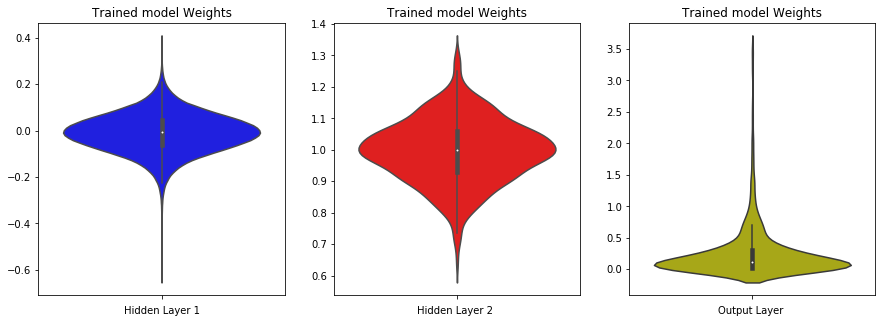

In [49]:
violin_plot(model_relu_batch_drop)

In [0]:
arch_2_model_4 = savetofile(history,'arch_2_model_4')

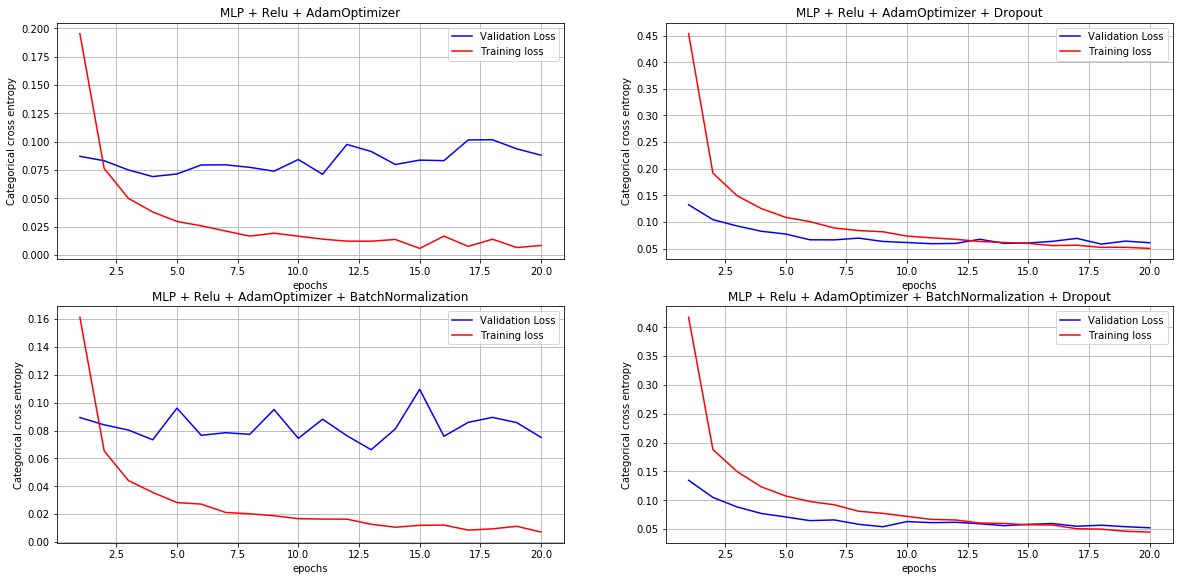

In [54]:
#plotting for all four models

plt.figure(figsize = (20,20))
#plt.grid()
x = list(range(1,nb_epoch+1))

"""MODEL 1"""
plt.subplot(4,2,1)
plt.title('MLP + Relu + AdamOptimizer')
plt.grid()
plt.plot(x,openfromfile('arch_2_model_1').history['val_loss'],color = 'b',label = 'Validation Loss')
plt.plot(x,openfromfile('arch_2_model_1').history['loss'],color = 'r',label = 'Training loss')
plt.xlabel('epochs')
plt.ylabel('Categorical cross entropy')
plt.legend()


"""MODEL 2"""

plt.subplot(4,2,2)
plt.title('MLP + Relu + AdamOptimizer + Dropout')
plt.grid()
plt.plot(x,openfromfile('arch_2_model_2').history['val_loss'],color = 'b',label = 'Validation Loss')
plt.plot(x,openfromfile('arch_2_model_2').history['loss'],color = 'r',label = 'Training loss')
plt.xlabel('epochs')
plt.ylabel('Categorical cross entropy')
plt.legend()



"""MODEL 3"""
plt.subplot(4,2,3)
plt.title('MLP + Relu + AdamOptimizer + BatchNormalization')
plt.grid()
plt.plot(x,openfromfile('arch_2_model_3').history['val_loss'],color = 'b',label = 'Validation Loss')
plt.plot(x,openfromfile('arch_2_model_3').history['loss'],color = 'r',label = 'Training loss')
plt.xlabel('epochs')
plt.ylabel('Categorical cross entropy')
plt.legend()


"""MODEL 4"""
plt.subplot(4,2,4)
plt.title('MLP + Relu + AdamOptimizer + BatchNormalization + Dropout')
plt.grid()
plt.plot(x,openfromfile('arch_2_model_4').history['val_loss'],color = 'b',label = 'Validation Loss')
plt.plot(x,openfromfile('arch_2_model_4').history['loss'],color = 'r',label = 'Training loss')
plt.xlabel('epochs')
plt.ylabel('Categorical cross entropy')
plt.legend()
plt.show()

##  Architecture 3: Model with 5 hidden layers
 
### Input(786) - relu(200) - relu(300) - relu (400) - relu(500) - relu(600) - softmax(10)

### Model1:  MLP + Relu + Adamoptimizer

In [66]:
from keras.initializers import he_normal

model_relu = Sequential()
model_relu.add(Dense(200, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed = None)))
model_relu.add(Dense(300, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(400, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(500, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(600, activation='relu', kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(x_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, Y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_60 (Dense)             (None, 300)               60300     
_________________________________________________________________
dense_61 (Dense)             (None, 400)               120400    
_________________________________________________________________
dense_62 (Dense)             (None, 500)               200500    
_________________________________________________________________
dense_63 (Dense)             (None, 600)               300600    
_________________________________________________________________
dense_64 (Dense)             (None, 10)                6010      
Total params: 844,810
Trainable params: 844,810
Non-trainable params: 0
_________________________________________________________________
None

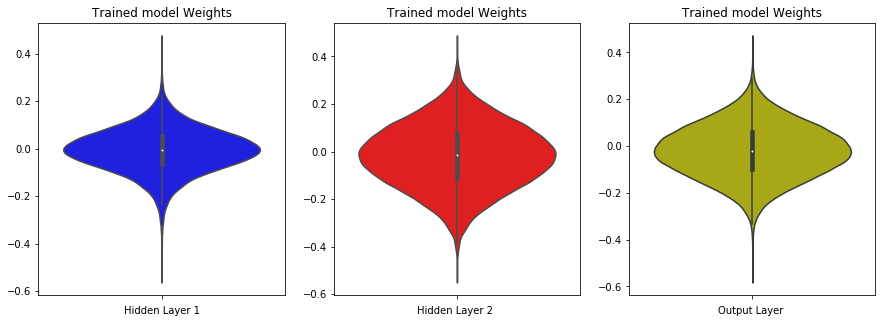

In [67]:
violin_plot(model_relu)

In [0]:
arch_3_model_1 = savetofile(history,'arch_3_model_1')

### Model2: MLP + Relu + Adamoptimizer + Dropout

In [56]:
## Model 2: mlp_relu+adam_dropout

model_relu_drop = Sequential()

model_relu_drop.add(Dense(200,activation = 'relu',input_shape = (input_dim,), kernel_initializer = he_normal(seed = None)))
model_relu_drop.add(Dropout(0.5))

model_relu_drop.add(Dense(300,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model_relu_drop.add(Dropout(0.5))

model_relu_drop.add(Dense(400,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model_relu_drop.add(Dropout(0.5))

model_relu_drop.add(Dense(500,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model_relu_drop.add(Dropout(0.5))

model_relu_drop.add(Dense(600,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model_relu_drop.add(Dropout(0.5))




model_relu_drop.add(Dense(output_dim,activation = 'softmax'))
print(model_relu_drop.summary())

model_relu_drop.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_relu_drop.fit(x_train,Y_train,batch_size = batch_size,epochs = nb_epoch,verbose = 1,validation_data = (x_test,Y_test))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 200)               157000    
_________________________________________________________________
dropout_11 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 300)               60300     
_________________________________________________________________
dropout_12 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 400)               120400    
_________________________________________________________________
dropout_13 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 500)               200500    
__________

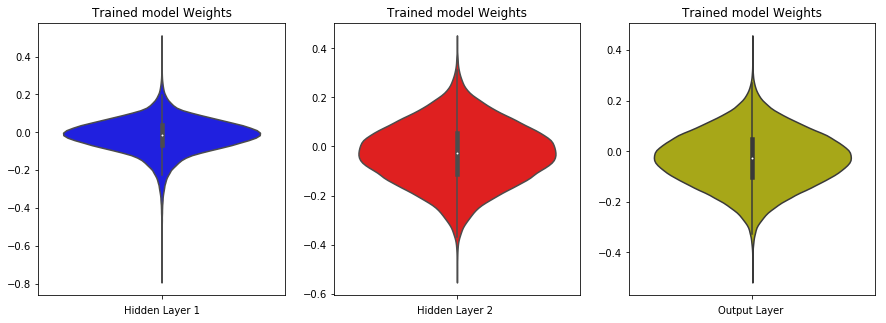

In [57]:
violin_plot(model_relu_drop)

In [0]:
arch_3_model_2 = savetofile(history,'arch_3_model_2')

### Model3: MLP + Relu + Adamoptimizer + BatchNormalization

In [59]:
## Model 3: Mlp+relu+adam+batchnormalization
model_relu_batch = Sequential()

model_relu_batch.add(Dense(200,activation = 'relu',input_shape = (input_dim,),kernel_initializer = he_normal(seed = None)))
model_relu_batch.add(BatchNormalization())

model_relu_batch.add(Dense(300,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model_relu_batch.add(BatchNormalization())

model_relu_batch.add(Dense(400,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model_relu_batch.add(BatchNormalization())

#model_relu_batch = Sequential()
model_relu_batch.add(Dense(500,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model_relu_batch.add(BatchNormalization())

model_relu_batch.add(Dense(600,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model_relu_batch.add(BatchNormalization())



model_relu_batch.add(Dense(output_dim,activation = 'softmax'))
print(model_relu_batch.summary())

model_relu_batch.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_relu_batch.fit(x_train,Y_train,batch_size = batch_size,epochs = nb_epoch,verbose = 1,validation_data = (x_test,Y_test))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 200)               157000    
_________________________________________________________________
batch_normalization_11 (Batc (None, 200)               800       
_________________________________________________________________
dense_48 (Dense)             (None, 300)               60300     
_________________________________________________________________
batch_normalization_12 (Batc (None, 300)               1200      
_________________________________________________________________
dense_49 (Dense)             (None, 400)               120400    
_________________________________________________________________
batch_normalization_13 (Batc (None, 400)               1600      
_________________________________________________________________
dense_50 (Dense)             (None, 500)               200500    
__________

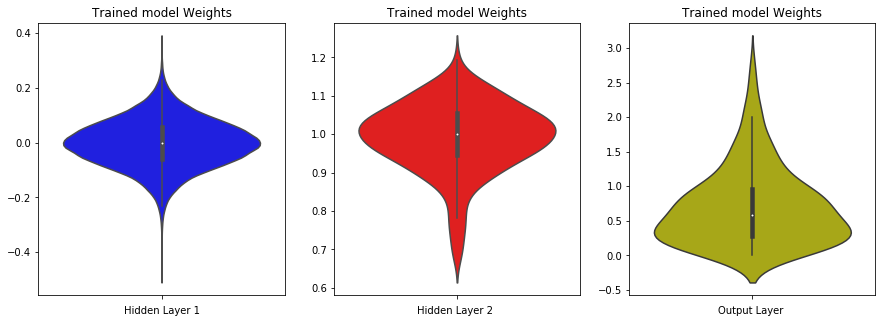

In [60]:
violin_plot(model_relu_batch)

In [0]:
arch_3_model_3 = savetofile(history,'arch_3_modell_3')

### Model4: MLP + Relu + Adamoptimizer + BtachNormalization + Dropout

In [62]:
## Model 4: mlp+ relu + adam+ batchNormalization + Dropout

model_relu_batch_drop = Sequential()
model_relu_batch_drop.add(Dense(200,activation = 'relu',input_shape = (input_dim,),kernel_initializer = he_normal(seed = None)))
model_relu_batch_drop.add(BatchNormalization())
model_relu_batch_drop.add(Dropout(0.5))


model_relu_batch_drop.add(Dense(300,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model_relu_batch_drop.add(BatchNormalization())
model_relu_batch_drop.add(Dropout(0.5))


model_relu_batch_drop.add(Dense(400,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model_relu_batch_drop.add(BatchNormalization())
model_relu_batch_drop.add(Dropout(0.5))


model_relu_batch_drop.add(Dense(500,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model_relu_batch_drop.add(BatchNormalization())
model_relu_batch_drop.add(Dropout(0.5))

model_relu_batch_drop.add(Dense(600,activation = 'relu',kernel_initializer = he_normal(seed = None)))
model_relu_batch_drop.add(BatchNormalization())
model_relu_batch_drop.add(Dropout(0.5))


model_relu_batch_drop.add(Dense(output_dim,activation = 'softmax'))
print(model_relu_batch_drop.summary())

model_relu_batch_drop.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_relu_batch_drop.fit(x_train,Y_train,batch_size = batch_size,epochs = nb_epoch,verbose = 1,validation_data = [x_test,Y_test])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 200)               157000    
_________________________________________________________________
batch_normalization_16 (Batc (None, 200)               800       
_________________________________________________________________
dropout_16 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 300)               60300     
_________________________________________________________________
batch_normalization_17 (Batc (None, 300)               1200      
_________________________________________________________________
dropout_17 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 400)               120400    
__________

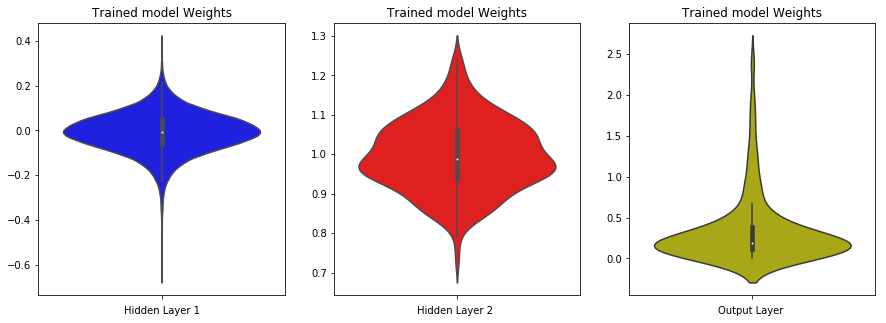

In [63]:
violin_plot(model_relu_batch_drop)

In [0]:
arch_3_model_4 = savetofile(history,'arch_3_model_4')

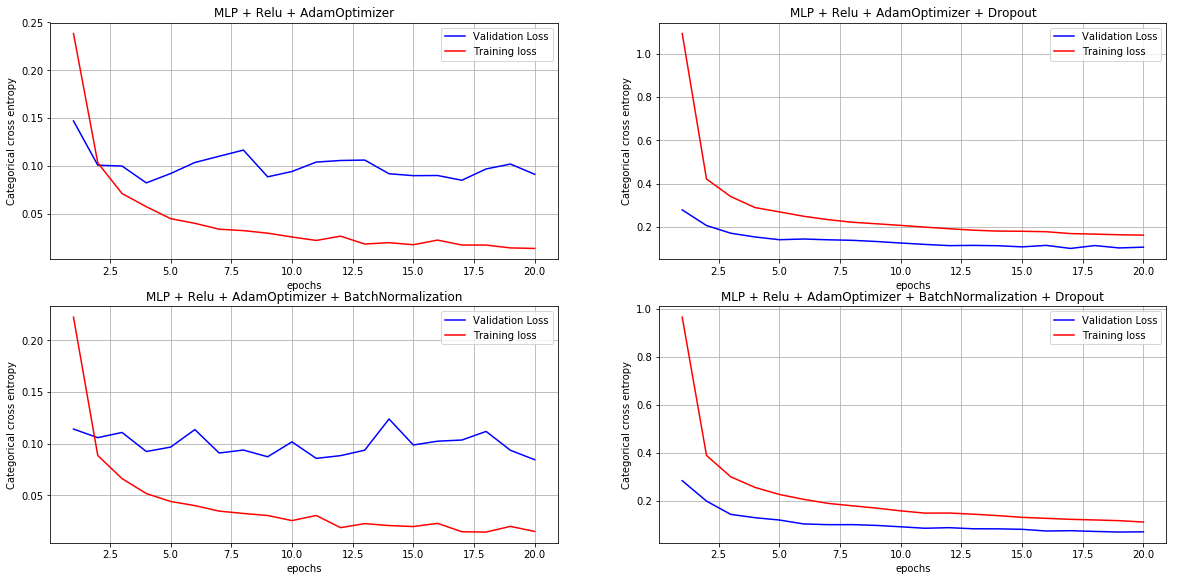

In [69]:
#plotting all the models 

plt.figure(figsize = (20,20))
#plt.grid()
x = list(range(1,nb_epoch+1))

"""MODEL 1"""
plt.subplot(4,2,1)
plt.title('MLP + Relu + AdamOptimizer')
plt.grid()
plt.plot(x,openfromfile('arch_3_model_1').history['val_loss'],color = 'b',label = 'Validation Loss')
plt.plot(x,openfromfile('arch_3_model_1').history['loss'],color = 'r',label = 'Training loss')
plt.xlabel('epochs')
plt.ylabel('Categorical cross entropy')
plt.legend()


"""MODEL 2"""

plt.subplot(4,2,2)
plt.title('MLP + Relu + AdamOptimizer + Dropout')
plt.grid()
plt.plot(x,openfromfile('arch_3_model_2').history['val_loss'],color = 'b',label = 'Validation Loss')
plt.plot(x,openfromfile('arch_3_model_2').history['loss'],color = 'r',label = 'Training loss')
plt.xlabel('epochs')
plt.ylabel('Categorical cross entropy')
plt.legend()



"""MODEL 3"""
plt.subplot(4,2,3)
plt.title('MLP + Relu + AdamOptimizer + BatchNormalization')
plt.grid()
plt.plot(x,openfromfile('arch_3_modell_3').history['val_loss'],color = 'b',label = 'Validation Loss')
plt.plot(x,openfromfile('arch_3_modell_3').history['loss'],color = 'r',label = 'Training loss')
plt.xlabel('epochs')
plt.ylabel('Categorical cross entropy')
plt.legend()


"""MODEL 4"""
plt.subplot(4,2,4)
plt.title('MLP + Relu + AdamOptimizer + BatchNormalization + Dropout')
plt.grid()
plt.plot(x,openfromfile('arch_3_model_4').history['val_loss'],color = 'b',label = 'Validation Loss')
plt.plot(x,openfromfile('arch_3_model_4').history['loss'],color = 'r',label = 'Training loss')
plt.xlabel('epochs')
plt.ylabel('Categorical cross entropy')
plt.legend()
plt.show()

### PROCEDURE:

__Following steps were followed__:

- Data is imported and one hot encoded for each of the classes.


- Primarily we are considering 3 different neural network architecture here:
    - MLP with 2 hidden layers
    - MLP with 3 hidden layers
    - MLP with 5 hidden layers
    
    
- In each of the architecture we have tried 4 different for understanding the intricate working of the model and how to avoid overfitting and underfitting of the data.
    - Simple MLP
    - MLP + dropout with dropout rate = 0.5
    - MLP with Batch Normalization
    - MLP with Batch Normalization and Dropout(dropout rate = 0.5)
    
- After implementing each of the 4 techniques in each architecture we plot the violin plots to see the distribution of weights that we get after the implementation of optimization Algorithm.

- Finally we plot the graphs of loss vs epochs in each architecture to see how regularization is affected by adding different layers in the model.

## Conclusion

In [70]:


from prettytable import PrettyTable

table_arch1 = PrettyTable()
models = ['MLP + relu + adamoptimizer','MLP + relu + adamoptimizer + dropout','MLP + relu + adamoptimizer + BatchNormalization','MLP + relu + adamoptimizer + BatchNormalization + Dropout']
tr_loss = ['0.005','0.0480','0.0074','0.0491']
tr_acc = ['99.82','98.47','99.72','98.38']
te_loss = ['0.101','0.0634','0.0768','0.054']
te_acc = ['98.02','98.28','98.16','98.31']

table_arch1.add_column('Model',models)
table_arch1.add_column('trainig loss',tr_loss)
table_arch1.add_column('Training Accuracy(%)',tr_acc)
table_arch1.add_column('Test loss',te_loss)
table_arch1.add_column('Test_Accuracy(%)',te_acc)
print('\t\t\t\t Architecture: Input(784)-Relu(512)-Relu(256)-SoftMax(10)')
print(table_arch1)
print('\n\n\n')

table_arch2 = PrettyTable()
models = ['MLP + relu + adamoptimizer','MLP + relu + adamoptimizer + dropout','MLP + relu + adamoptimizer + BatchNormalization','MLP + relu + adamoptimizer + BatchNormalization + Dropout']
tr_loss = ['0.0052','0.0507','0.0002','0.0462']
tr_acc = ['99.84','98.48','99.72','98.53']
te_loss = ['0.0935','0.0676','0.0885','0.0542']
te_acc = ['98.01','98.36','98.03','98.47']

table_arch2.add_column('Model',models)
table_arch2.add_column('trainig loss',tr_loss)
table_arch2.add_column('Training Accuracy(%)',tr_acc)
table_arch2.add_column('Test loss',te_loss)
table_arch2.add_column('Test_Accuracy(%)',te_acc)
print('\t\t\t\t Architecture: Input(784)-Relu(1000)-Relu(500)-Relu(250)-SoftMax(10)')
print(table_arch2)
print('\n\n\n')



table_arch3 = PrettyTable()
models = ['MLP + relu + adamoptimizer','MLP + relu + adamoptimizer + dropout','MLP + relu + adamoptimizer + BatchNormalization','MLP + relu + adamoptimizer + BatchNormalization + Dropout']
tr_loss = ['0.0137','0.1654','0.0141','0.114']
tr_acc = ['99.60','95.75','99.57','96.64']
te_loss = ['0.0935','0.1105','0.0847','0.0784']
te_acc = ['98.15','97.21','98.05','97.83']

table_arch3.add_column('Model',models)
table_arch3.add_column('trainig loss',tr_loss)
table_arch3.add_column('Training Accuracy(%)',tr_acc)
table_arch3.add_column('Test loss',te_loss)
table_arch3.add_column('Test_Accuracy(%)',te_acc)
print('\t\t\t\t Architecture: Input(784)-Relu(200)-Relu(300)-Relu(400)-Relu(500)-Relu(600)-SoftMax(10)')
print(table_arch3)

				 Architecture: Input(784)-Relu(512)-Relu(256)-SoftMax(10)
+-----------------------------------------------------------+--------------+----------------------+-----------+------------------+
|                           Model                           | trainig loss | Training Accuracy(%) | Test loss | Test_Accuracy(%) |
+-----------------------------------------------------------+--------------+----------------------+-----------+------------------+
|                 MLP + relu + adamoptimizer                |    0.005     |        99.82         |   0.101   |      98.02       |
|            MLP + relu + adamoptimizer + dropout           |    0.0480    |        98.47         |   0.0634  |      98.28       |
|      MLP + relu + adamoptimizer + BatchNormalization      |    0.0074    |        99.72         |   0.0768  |      98.16       |
| MLP + relu + adamoptimizer + BatchNormalization + Dropout |    0.0491    |        98.38         |   0.054   |      98.31       |
+--------------------